# Explore Correlations

#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as xp
%matplotlib inline

#### In this challenge we will use the Temp_States dataset. 

#### Import the data into a dataframe: 

In [8]:
cdd_data = pd.read_csv('CDD.csv', sep='\t')
cdd_data.head(5)

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,...,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Explore the dataframe

In [10]:
cdd_data.dtypes

EVENT CATEGORY                     object
EVENT GROUP                        object
EVENT SUBGROUP                     object
EVENT TYPE                         object
PLACE                              object
EVENT START DATE                   object
COMMENTS                           object
FATALITIES                        float64
INJURED / INFECTED                float64
EVACUATED                         float64
ESTIMATED TOTAL COST              float64
NORMALIZED TOTAL COST             float64
EVENT END DATE                     object
FEDERAL DFAA PAYMENTS             float64
PROVINCIAL DFAA PAYMENTS          float64
PROVINCIAL DEPARTMENT PAYMENTS    float64
MUNICIPAL COSTS                   float64
OGD COSTS                         float64
INSURANCE PAYMENTS                float64
NGO PAYMENTS                      float64
UTILITY - PEOPLE AFFECTED         float64
MAGNITUDE                         float64
dtype: object

In [14]:
null_cols = cdd_data.isnull().sum()
print(null_cols)
print(cdd_data.shape)

EVENT CATEGORY                       0
EVENT GROUP                          0
EVENT SUBGROUP                       0
EVENT TYPE                           0
PLACE                                0
EVENT START DATE                     0
COMMENTS                             0
FATALITIES                          89
INJURED / INFECTED                 115
EVACUATED                           70
ESTIMATED TOTAL COST               531
NORMALIZED TOTAL COST              531
EVENT END DATE                       0
FEDERAL DFAA PAYMENTS              604
PROVINCIAL DFAA PAYMENTS           678
PROVINCIAL DEPARTMENT PAYMENTS     997
MUNICIPAL COSTS                   1060
OGD COSTS                         1075
INSURANCE PAYMENTS                1017
NGO PAYMENTS                      1081
UTILITY - PEOPLE AFFECTED           83
MAGNITUDE                          114
dtype: int64
(1089, 22)


#### Clean the data

In [17]:
drop_cols = list(null_cols[null_cols > 600].index)
cleaned_cdd = cdd_data.drop(drop_cols, axis=1)
cleaned_cdd.head(5)

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,EVENT END DATE,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,0.0,0.0,25/12/2016 12:00:00 AM,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,0.0,0.0,29/11/2016 12:00:00 AM,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,0.0,0.0,18/11/2016 12:00:00 AM,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,16700000.0,780373.8,21/12/2016 12:00:00 AM,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,0.0,0.0,13/10/2016 12:00:00 AM,NaN,NaN


In [19]:
null_cols2 = cleaned_cdd.isnull().sum()
print(null_cols2)
print(cleaned_cdd.shape)

EVENT CATEGORY                 0
EVENT GROUP                    0
EVENT SUBGROUP                 0
EVENT TYPE                     0
PLACE                          0
EVENT START DATE               0
COMMENTS                       0
FATALITIES                    89
INJURED / INFECTED           115
EVACUATED                     70
ESTIMATED TOTAL COST         531
NORMALIZED TOTAL COST        531
EVENT END DATE                 0
UTILITY - PEOPLE AFFECTED     83
MAGNITUDE                    114
dtype: int64
(1089, 15)


#### Print the correlation matrix

In [24]:
cdd_corr2 = cleaned_cdd.corr()
cdd_corr2

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.415388,0.049626
UTILITY - PEOPLE AFFECTED,-0.001548,-0.001498,-0.002430,0.412833,0.415388,1.000000,-0.002231
MAGNITUDE,-0.003988,-0.003356,-0.005672,0.064788,0.049626,-0.002231,1.000000


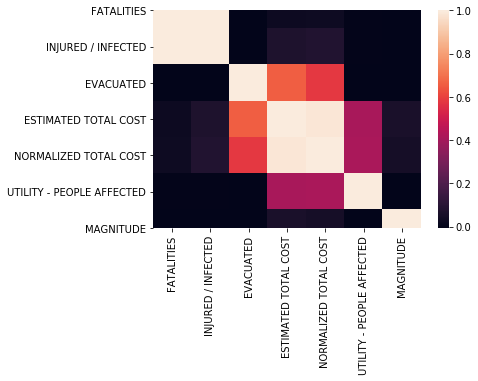

In [30]:
cdd_heat2 = sns.heatmap(cdd_corr2)
cdd_heat2

In [29]:
#Ended up printing uncleaned correlation for the exercise below (find 3 pairs)
cdd_corr = cdd_data.corr()
cdd_corr

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,0.014838,-0.020317,-0.023630,0.965880,0.417442,0.241347,0.966678,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,0.311491,0.404215,-0.002056,0.965286,-0.036915,0.456924,0.999639,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,0.406679,0.083692,0.212975,0.514186,0.154761,0.825937,0.838898,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.796016,0.571493,0.184582,0.992845,0.238737,0.923990,0.999996,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.770445,0.577570,0.158622,0.992722,0.201398,0.849023,0.999995,0.415388,0.049626
FEDERAL DFAA PAYMENTS,0.014838,0.311491,0.406679,0.796016,0.770445,1.000000,0.626224,0.070189,0.956807,-0.021965,0.779394,0.999958,0.022835,0.003859
PROVINCIAL DFAA PAYMENTS,-0.020317,0.404215,0.083692,0.571493,0.577570,0.626224,1.000000,0.115947,0.717184,1.000000,0.850335,0.998123,-0.003366,0.119110
PROVINCIAL DEPARTMENT PAYMENTS,-0.023630,-0.002056,0.212975,0.184582,0.158622,0.070189,0.115947,1.000000,0.078196,0.641075,0.299118,0.994163,-0.026786,NaN
MUNICIPAL COSTS,0.965880,0.965286,0.514186,0.992845,0.992722,0.956807,0.717184,0.078196,1.000000,NaN,0.991906,0.999999,0.765488,NaN
OGD COSTS,0.417442,-0.036915,0.154761,0.238737,0.201398,-0.021965,1.000000,0.641075,NaN,1.000000,NaN,NaN,-0.092983,0.208801


#### Print a heat map of this correlation matrix 

(hint: use seaborn.heatmap())

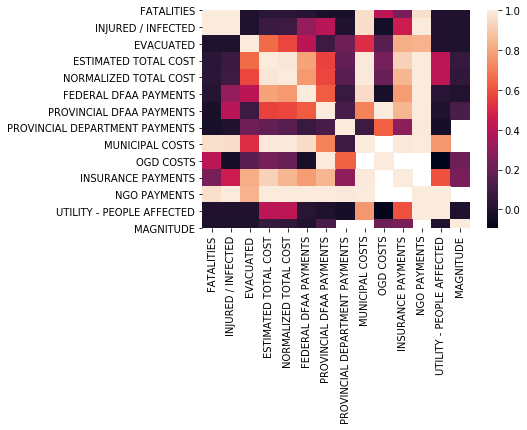

In [31]:
cdd_heat = sns.heatmap(cdd_corr)
cdd_heat

#### Find 3 pairs of columns, one pair that is highly positively correlated, one for which the correlation is almost zero and one pair that is negatively correlated.

Choices:
Column selection: Fatalities & Injured/Infected (high positive), Fatalities & Evacuated (zero), 
Utility - People Affected & OGD Costs (negative)


#### In each case write down an explanation why we see this correlation

###### Fatalities & Injured/Infected:

 positive because people who are injured or infected have a higher chance to also belong to the group of fatalities in a given disaster event.

###### Fatalities & Evacuated: 

Dead people don't evacuate.

###### Utility - People Affected & OGD Costs: 

OGD stands for "Other Government Departments and Agencies";  these include things like Canada Post, Canadian Food Inspection Agency, Environment and Climate Change Canada,  National Energy Board, Health Canada, Public Health Agency of Canada. The latter might be relevant in disaster situations but the OGD column had many NaN values, so it's hard to say how it plays a part.  The correlation here is negative, which is also confusing.

#### Look up the pairplot function in Seaborn. Use it to plot the pairwise relations between the six columns you selected. 

###### Fatalities & Injured/Infected

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



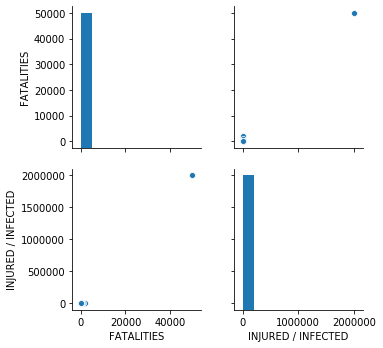

In [38]:
high_pos = cdd_data.filter(['FATALITIES','INJURED / INFECTED'], axis=1)
sns.pairplot(high_pos)

###### Fatalities & Evacuated 

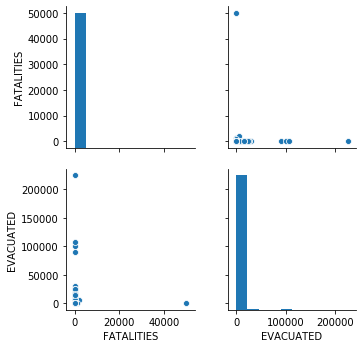

In [39]:
no_corr = cdd_data.filter(['FATALITIES','EVACUATED'], axis=1)
sns.pairplot(no_corr)

###### Utility - People Affected & OGD Costs

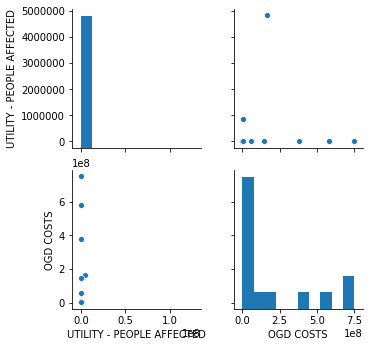

In [40]:
neg_corr = cdd_data.filter(['UTILITY - PEOPLE AFFECTED','OGD COSTS'], axis=1)
sns.pairplot(neg_corr)

#### Does the outcome above confirm your ideas? Describe in a comment.

I am unsure what I'm looking at, to be honest. Researching...